In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa, librosa.display

import tensorflow as tf 
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, GRU, Input
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
X_train = np.load('/content/gdrive/MyDrive/data/MFCC_Augmented2/X_train.npy')
y_train = np.load('/content/gdrive/MyDrive/data/MFCC_Augmented2/y_train.npy')
X_test = np.load('/content/gdrive/MyDrive/data/MFCC_Augmented2/X_test.npy')
y_test = np.load('/content/gdrive/MyDrive/data/MFCC_Augmented2/y_test.npy')
X_val = np.load('/content/gdrive/MyDrive/data/MFCC_Augmented2/X_val.npy')
y_val = np.load('/content/gdrive/MyDrive/data/MFCC_Augmented2/y_val.npy')

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(16893, 98) (16893, 2)
(2109, 98) (2109, 2)
(2088, 98) (2088, 2)


In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.GRU(128, return_sequences = False, input_shape = (98,1)))
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(2))
model.add(tf.keras.layers.Activation('softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 activation_1 (Activation)   (None, 32)                0

In [ ]:
optimizer=tf.keras.optimizers.Adam(amsgrad=True, name='Adam')

In [ ]:
model.compile(
    loss="categorical_crossentropy",
    optimizer = optimizer,
    metrics=['accuracy']
)

In [ ]:
print("Model Score: \n")
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 120, shuffle = False)

Model Score: 

Epoch 1/120
528/528 [==============================] - 39s 69ms/step - loss: 0.6958 - accuracy: 0.5098 - val_loss: 0.6930 - val_accuracy: 0.5153
Epoch 2/120
528/528 [==============================] - 35s 67ms/step - loss: 0.6931 - accuracy: 0.5039 - val_loss: 0.6931 - val_accuracy: 0.4943
Epoch 3/120
528/528 [==============================] - 35s 66ms/step - loss: 0.6933 - accuracy: 0.5001 - val_loss: 0.6932 - val_accuracy: 0.4943
Epoch 4/120
528/528 [==============================] - 36s 67ms/step - loss: 0.6932 - accuracy: 0.5016 - val_loss: 0.6932 - val_accuracy: 0.4943
Epoch 5/120
528/528 [==============================] - 36s 68ms/step - loss: 0.6931 - accuracy: 0.5001 - val_loss: 0.6931 - val_accuracy: 0.4943
Epoch 6/120
528/528 [==============================] - 35s 67ms/step - loss: 0.6932 - accuracy: 0.5028 - val_loss: 0.6933 - val_accuracy: 0.4943
Epoch 7/120
528/528 [==============================] - 34s 65ms/step - loss: 0.6931 - accuracy: 0.5048 - val_loss: 

In [ ]:
model.save("/content/gdrive/MyDrive/Models/RNN-GRU-WithoutAttention.h5")
score = model.evaluate(X_test, y_test)
print(score)

66/66 [==============================] - 1s 19ms/step - loss: 0.3165 - accuracy: 0.9431
[0.3164730668067932, 0.9431009888648987]


In [ ]:
pip install plot_keras_history

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 KB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for plot_keras_history: filename=plot_keras_history-1.1.38-py3-none-any.whl size=9472 sha256=e9b25f61f1f5701b379ceff758dbd5172430af35306b074473571485a4d9fcef
  Stored in directory: /root/.cache/pip/wheels/97/a5/76/35ae3e15da1ce4530de8591b0bcd7716f6d6752a4808f01c04
  Created wheel for sanitize_ml_labels: filename=sanitize_ml_labels-1.0.50-py3-none-any.whl size=320514 sha256=9be2c8d4c51586f8717db328ec10690fbe3b8007f3aaee968feea736a84d2387
  Stored in directory: /root/.cache/pip/wheels/a3/5f/ba/ddd191edb6c749a63cffabd28714d5600b5b58014daf7434a8
  Created wheel for support_developer: filename=support_developer-1.0.5-py3-none-any.whl siz

(<Figure size 1000x500 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <AxesSubplot:title={'center':'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

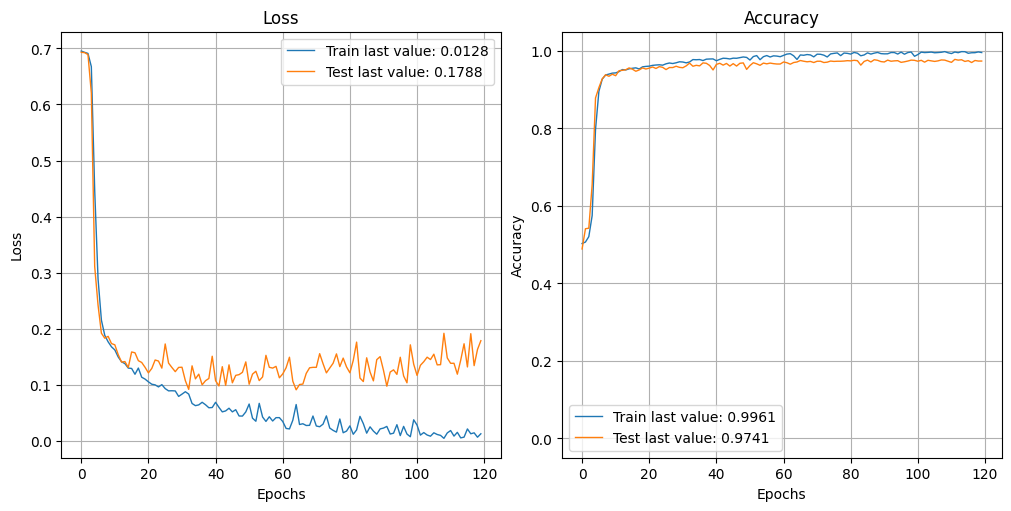

In [ ]:
from plot_keras_history import show_history, plot_history
plot_history(history)

In [ ]:
import matplotlib.pyplot as plt
import itertools
import numpy as np

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Model Classification Report: 

66/66 [==============================] - 2s 27ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1049
           1       0.98      0.98      0.98      1060

    accuracy                           0.98      2109
   macro avg       0.98      0.98      0.98      2109
weighted avg       0.98      0.98      0.98      2109

Confusion matrix, without normalization
[[1024   25]
 [  20 1040]]


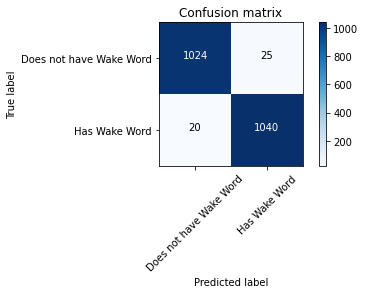

In [ ]:
print("Model Classification Report: \n")
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print(classification_report(np.argmax(y_test, axis=1), y_pred))
plot_confusion_matrix(cm, classes=["Does not have Wake Word", "Has Wake Word"])

## PREDICTION & LATENCY

In [ ]:
pip install spafe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 KB 3.2 MB/s eta 0:00:00


In [ ]:
import spafe
from spafe.features.lfcc import lfcc
import pywt

In [ ]:
def predict(audio):
  audio_data, sr = librosa.load(audio)

  wavelet = 'db4'
  level = 4
  coeffs = pywt.wavedec(audio_data, wavelet, level=level)
  threshold = np.median(np.abs(coeffs[-level])) / 0.6745
  for i in range(1, len(coeffs)):
    coeffs[i] = pywt.threshold(coeffs[i], threshold)
  denoised_audio = pywt.waverec(coeffs, wavelet)

  lfccs  = lfcc(denoised_audio, fs = sr, num_ceps=13)
  lfccs_processed = np.mean(lfccs.T, axis=0) # some pre-processing
  lfccs_new = np.expand_dims(np.asarray(lfccs_processed), axis=0)
  predictions = model.predict(lfccs_new)
  return predictions

In [ ]:
audio_for_pred = "/content/gdrive/MyDrive/Marvin/marvin (170).wav"
print(np.round(predict(audio_for_pred)))

1/1 [==============================] - 0s 60ms/step
[[1. 0.]]


In [ ]:
audio_for_pred = "/content/gdrive/MyDrive/False/yes (824).wav"
print(np.round(predict(audio_for_pred)))

1/1 [==============================] - 0s 48ms/step
[[1. 0.]]
